<a href="https://colab.research.google.com/github/khadija267/Sign-Language-Classification/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [1]:
# import important libraries
import PIL
import os
from PIL import Image
import os
import skimage.io as skio
from skimage.transform import resize
import numpy as np
import pandas as pd
# import colab drive to access my drive and the data uploaded there.
from google.colab import drive
drive.mount('/content/drive')
# get the location of the data
location = r'/content/drive/MyDrive/CVProjectDataset'
# make array of the classes of the data
classes=['Call me','Dislike','Goodjob','Good luck','I love you','OK','Peace','Power','Talk to the hand','You']
# make a list of the folders that contain the data
folders=['Train','Test','Validation']
# make empty lists to append to them each image
X_train=[]
X_test=[]
X_valid=[]
y_train=[]
y_test=[]
y_valid=[]
train_df=[]
# for looping the folders and making a train, validation, and test images arrays
for ind,it in enumerate(classes):
    for ind_1 , it_1 in enumerate(folders):
        for filex in os.listdir(location+"/"+it+"/"+it_1):
            if it_1=='Train':
                f_img = location+"/"+it+"/"+it_1+"/"+filex
                img = skio.imread(f_img)
                img = resize(img,(40,32))
                X_train.append(img)
                y_train.append(ind)
                train_df.append(img.flatten())

            elif it_1=='Test':
                f_img =location+"/"+it+"/"+it_1+"/"+filex
                img = skio.imread(f_img)
                img = resize(img,(40,32))
                X_test.append(img)
                y_test.append(ind)


            elif it_1=='Validation':
                f_img = location+"/"+it+"/"+it_1+"/"+filex
                img = skio.imread(f_img)
                img = resize(img,(40,32))
                X_valid.append(img)
                y_valid.append(ind)

            else:
                print("The destination file does not exist!")


# make a df for the data if needed in the further steps
df=pd.DataFrame(train_df)
df['Class']=y_train

Mounted at /content/drive


Make sure of the data size

In [ ]:
len(X_train[0][0])

32

In [ ]:
len(X_train)

327

In [ ]:
len(X_test)

100

In [ ]:
len(X_valid)

100

In [ ]:
len(y_train)

327

convert the list into a numpy array that is used in further modeling

In [2]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test) 


# VGG16 Model Baseline

In [4]:
# import keras from tensorflow as needed to import the vgg16 model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from keras.models import Model
from keras.layers import Dense, Activation, Flatten
# load model without classifier layers
model = VGG19(include_top=False, input_shape=X_train[0].shape)
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()

80150528/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 40, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 40, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 20, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 20, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 20, 16, 128)       147584    
                                                              

In [5]:
import tensorflow.keras
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test_k = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)

sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
model.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = model.fit(X_train, y_train_k, batch_size=128, epochs=50, verbose=1, 
                                 validation_data=(X_test, y_test_k))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


3/3 [==============================] - 16s 1s/step - loss: 2.3343 - accuracy: 0.0336 - val_loss: 2.2946 - val_accuracy: 0.0300
Epoch 2/50
3/3 [==============================] - 0s 87ms/step - loss: 2.2671 - accuracy: 0.0398 - val_loss: 2.2495 - val_accuracy: 0.0300
Epoch 3/50
3/3 [==============================] - 0s 88ms/step - loss: 2.2032 - accuracy: 0.0979 - val_loss: 2.2052 - val_accuracy: 0.2000
Epoch 4/50
3/3 [==============================] - 0s 87ms/step - loss: 2.1449 - accuracy: 0.2477 - val_loss: 2.1626 - val_accuracy: 0.2700
Epoch 5/50
3/3 [==============================] - 0s 88ms/step - loss: 2.0907 - accuracy: 0.2752 - val_loss: 2.1181 - val_accuracy: 0.2900
Epoch 6/50
3/3 [==============================] - 0s 86ms/step - loss: 2.0340 - accuracy: 0.3089 - val_loss: 2.0742 - val_accuracy: 0.3000
Epoch 7/50
3/3 [==============================] - 0s 86ms/step - loss: 1.9791 - accuracy: 0.3517 - val_loss: 2.0286 - val_accuracy: 0.3500
Epoch 8/50
3/3 [=======================

In [6]:
history.history['accuracy']

[0.03363914415240288,
 0.03975535184144974,
 0.09785933047533035,
 0.24770642817020416,
 0.2752293646335602,
 0.30886849761009216,
 0.3516819477081299,
 0.40366971492767334,
 0.4587155878543854,
 0.5321100950241089,
 0.6116207838058472,
 0.6452599167823792,
 0.6911314725875854,
 0.6972476840019226,
 0.7064220309257507,
 0.7247706651687622,
 0.8012232184410095,
 0.8409786224365234,
 0.856269121170044,
 0.8623853325843811,
 0.8318042755126953,
 0.9235473871231079,
 0.9449541568756104,
 0.9449541568756104,
 0.9480122327804565,
 0.9510703086853027,
 0.9449541568756104,
 0.9571865200996399,
 0.9449541568756104,
 0.963302731513977,
 0.9602446556091309,
 0.9296635985374451,
 0.819571852684021,
 0.9418960213661194,
 0.9571865200996399,
 0.9755351543426514,
 0.9724770784378052,
 0.9816513657569885,
 0.9755351543426514,
 0.9938837885856628,
 0.9877675771713257,
 0.9908257126808167,
 0.9816513657569885,
 0.9847095012664795,
 0.9938837885856628,
 0.9938837885856628,
 0.9908257126808167,
 0.9938837

In [7]:
y_predict_prob = model.predict(X_test)
y_predict = y_predict_prob.argmax(axis=-1)

In [8]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test, y_predict)
conf_mx

array([[ 7,  0,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  9,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  8,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10]])

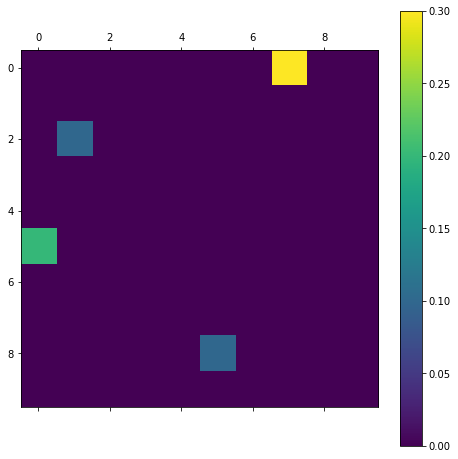

In [9]:

import matplotlib.pyplot as plt

def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
    
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()

> The model mistakens the class 7,5 and 2

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.89      0.80      0.84        10
           6       1.00      1.00      1.00        10
           7       0.77      1.00      0.87        10
           8       1.00      0.90      0.95        10
           9       1.00      1.00      1.00        10

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



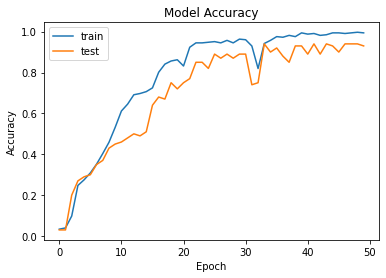

In [11]:
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


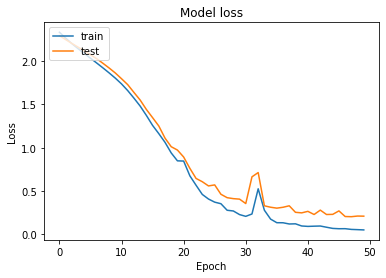

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



The model is a good fit, as the training loss at the beginnig is high but it's decreasing while the model sees more examples, while the validation loss started high and it's decreasing over examples. 

# VGG16 with data augmentation

In [13]:
# make a df of X_train and y_train to make it easy to select each class then to apply augmentation for each class individually
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3831,3832,3833,3834,3835,3836,3837,3838,3839,Class
0,0.302022,0.309865,0.298529,0.298836,0.306679,0.297059,0.293934,0.301777,0.290012,0.287745,...,0.057843,0.062439,0.067341,0.067647,0.065196,0.050184,0.077451,0.066667,0.043627,0
1,0.328922,0.348529,0.332843,0.322549,0.342157,0.326471,0.315502,0.335110,0.319424,0.314216,...,0.067770,0.075245,0.124755,0.067157,0.054718,0.082782,0.087868,0.064828,0.074081,0
2,0.297488,0.305331,0.293566,0.295588,0.303431,0.291667,0.290686,0.298529,0.286765,0.285784,...,0.043934,0.062255,0.065012,0.063848,0.072365,0.053064,0.050368,0.050858,0.020466,0
3,0.293627,0.317157,0.317157,0.288725,0.312255,0.312255,0.281373,0.304902,0.304902,0.271569,...,0.123958,0.207108,0.307598,0.113235,0.198223,0.288603,0.128676,0.213051,0.294914,0
4,0.320588,0.336275,0.332353,0.314216,0.329902,0.325980,0.309314,0.325000,0.321078,0.312745,...,0.276471,0.256005,0.264338,0.295159,0.318505,0.346140,0.200919,0.259375,0.306434,0


In [14]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.002,
        height_shift_range=0.002,
         zoom_range=0.01,
         horizontal_flip=True,
        fill_mode='nearest')

In [16]:
for layer in model.layers:
    layer.trainable = False
model = VGG19(include_top=False, input_shape=X_train[0].shape)
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
class2 = Dense(1024, activation='relu')(class1)

output = Dense(10, activation='softmax')(class2)

model_aug = Model(inputs=model.inputs, outputs=output)
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 40, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 40, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 40, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 20, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 20, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 20, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 10, 8, 128)        0     

In [17]:
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test_k = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)

sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
model_aug.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = model_aug.fit(datagen.flow(X_train, y_train_k), batch_size=128, epochs=50, verbose=1, 
                                 validation_data=(X_test, y_test_k))


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


11/11 [==============================] - 4s 155ms/step - loss: 2.3381 - accuracy: 0.0917 - val_loss: 2.2598 - val_accuracy: 0.0800
Epoch 2/50
11/11 [==============================] - 0s 44ms/step - loss: 2.2057 - accuracy: 0.1804 - val_loss: 2.1738 - val_accuracy: 0.1800
Epoch 3/50
11/11 [==============================] - 0s 40ms/step - loss: 2.1008 - accuracy: 0.3486 - val_loss: 2.0939 - val_accuracy: 0.3400
Epoch 4/50
11/11 [==============================] - 0s 39ms/step - loss: 1.9874 - accuracy: 0.5229 - val_loss: 1.9997 - val_accuracy: 0.5000
Epoch 5/50
11/11 [==============================] - 0s 40ms/step - loss: 1.8558 - accuracy: 0.5963 - val_loss: 1.8549 - val_accuracy: 0.5600
Epoch 6/50
11/11 [==============================] - 0s 40ms/step - loss: 1.6996 - accuracy: 0.5963 - val_loss: 1.6819 - val_accuracy: 0.5900
Epoch 7/50
11/11 [==============================] - 0s 40ms/step - loss: 1.5103 - accuracy: 0.6575 - val_loss: 1.4740 - val_accuracy: 0.5300
Epoch 8/50
11/11 [=====

In [18]:
y_predict_prob = model_aug.predict(X_test)
y_predict = y_predict_prob.argmax(axis=-1)

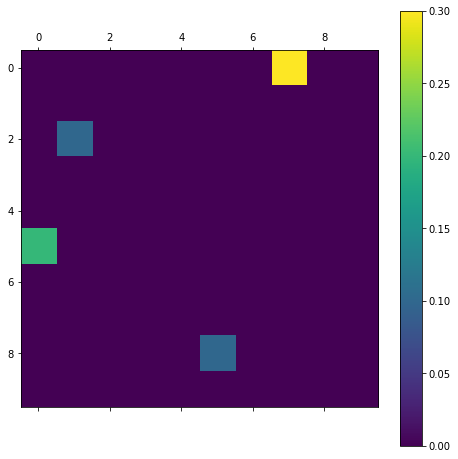

In [19]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()

In [20]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.78      0.70      0.74        10
           6       1.00      1.00      1.00        10
           7       0.71      1.00      0.83        10
           8       0.89      0.80      0.84        10
           9       0.91      1.00      0.95        10

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



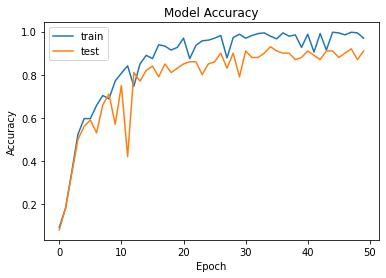

In [21]:
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

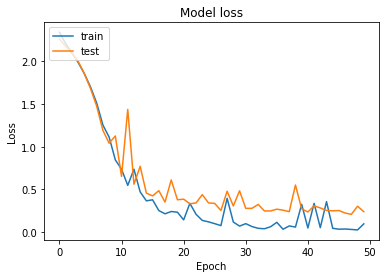

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# VGG16 with data regularization

In [24]:
from keras.layers import BatchNormalization
for layer in model.layers:
    layer.trainable = False
model = VGG19(include_top=False, input_shape=X_train[0].shape)
flat1 = Flatten()(model.layers[-1].output)
t=BatchNormalization()(flat1)
        
class1 = Dense(1024, activation='relu')(t)
tt=BatchNormalization()(class1)
output = Dense(10, activation='softmax')(tt)

model_reg = Model(inputs=model.inputs, outputs=output)
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 40, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 40, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 40, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 20, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 20, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 20, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 10, 8, 128)        0     

In [25]:
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test_k = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)

sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
model_reg.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = model_reg.fit(X_train, y_train_k, batch_size=128, epochs=50, verbose=1, 
                                 validation_data=(X_test, y_test_k))


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


3/3 [==============================] - 2s 256ms/step - loss: 2.4330 - accuracy: 0.3609 - val_loss: 2.2416 - val_accuracy: 0.2000
Epoch 2/50
3/3 [==============================] - 0s 92ms/step - loss: 0.6021 - accuracy: 0.8716 - val_loss: 2.1924 - val_accuracy: 0.2700
Epoch 3/50
3/3 [==============================] - 0s 92ms/step - loss: 0.2830 - accuracy: 0.9664 - val_loss: 2.1640 - val_accuracy: 0.2000
Epoch 4/50
3/3 [==============================] - 0s 90ms/step - loss: 0.1709 - accuracy: 0.9878 - val_loss: 2.1516 - val_accuracy: 0.3000
Epoch 5/50
3/3 [==============================] - 0s 90ms/step - loss: 0.1309 - accuracy: 0.9939 - val_loss: 2.1391 - val_accuracy: 0.3000
Epoch 6/50
3/3 [==============================] - 0s 90ms/step - loss: 0.1175 - accuracy: 0.9939 - val_loss: 2.1271 - val_accuracy: 0.3000
Epoch 7/50
3/3 [==============================] - 0s 89ms/step - loss: 0.0883 - accuracy: 1.0000 - val_loss: 2.1139 - val_accuracy: 0.3000
Epoch 8/50
3/3 [=====================

In [26]:
y_predict_prob = model_reg.predict(X_test)
y_predict = y_predict_prob.argmax(axis=-1)

In [27]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test, y_predict)
conf_mx

array([[ 8,  0,  0,  0,  0,  1,  0,  1,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  2,  6,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  5,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  9,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  0],
       [ 1,  0,  0,  0,  0,  4,  0,  0,  0,  5]])

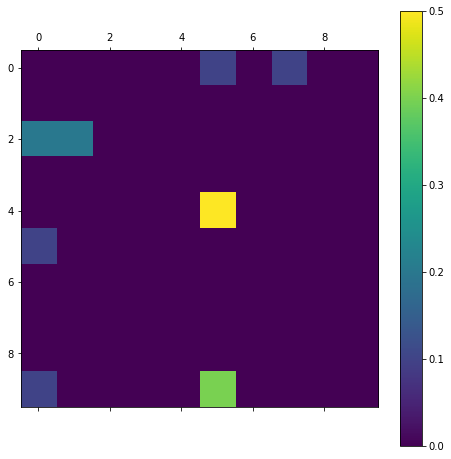

In [28]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()


In [29]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.83      1.00      0.91        10
           2       1.00      0.60      0.75        10
           3       1.00      1.00      1.00        10
           4       1.00      0.50      0.67        10
           5       0.47      0.90      0.62        10
           6       1.00      1.00      1.00        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      0.50      0.67        10

    accuracy                           0.83       100
   macro avg       0.89      0.83      0.83       100
weighted avg       0.89      0.83      0.83       100



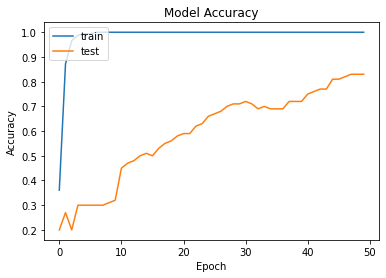

In [30]:
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

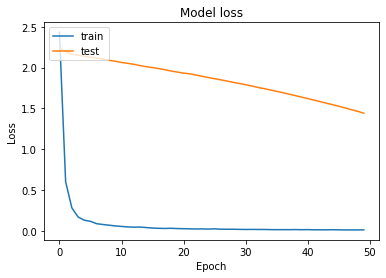

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# References
[1] https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/<br>
[2] https://keras.io/api/applications/vgg/ <br>
[3] https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5<br>
[4] https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/<br>